In [ ]:
! pip install --quiet --user sklearn nltk spacy
! python -m spacy download en_core_web_sm

# Classifying Text

This notebook contains videos and exercises that will guide you through some basic ideas in classifying text.

The goals for this notebook are as follows: 

1. Practice visualizing features (words) of a text corpus.

2. Understand the relationship between two common model choices when classifying text in the term frequence space (Logistic Regression and Naive Bayes).

3. Practice working with `sklearn` to classifying text data.

This repo contains two notebooks: 1) Videos/Exercises 2) A graded assignment.

After each video in this notebook is a small exercise. I really encourage you to try the exercise on your own. There are solutions in `solutions.py` that can help you see that you are on the right track and give you new ideas, but I urge you not to look at those until you have tried to solve the solution on your own. Implementation is good practice!

### DOWNLOADING THE DATA

The data for the later exercises and the assignment is available in Box:

`data/sentiment.tar.gz`

You should download that to this directory and uncompress it into a folder called `sentiment`. Confirm that you have both `sentiment/yelps.csv` and `sentiment/movies.csv` in the directory of this notebook. 

In [1]:
import matplotlib.pyplot as plt
from IPython.lib.display import YouTubeVideo

plt.rcParams['figure.figsize'] = [12, 6]

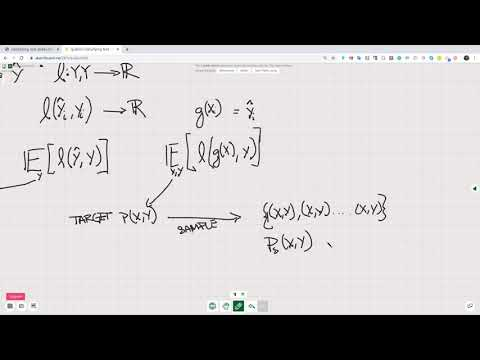

In [2]:
YouTubeVideo('-ovLcLGrW2A', width=640,height=360)

In [3]:
docs = ['"I dont believe people who see ghosts", said Mannie, before spitting into the wind and riding his bike down the street at top speed. He then went home and ate peanut-butter and jelly sandwiches all day with big glasses of milk, which he loves. Mannie really liked ghosts and he often told his mother so. He believed he saw them everywhere and that they existed to help us.',

        'People see incredible things. One time I saw some people talking about things they were seeing, and those people were so much fun. They saw clouds and they saw airplanes and they saw Ghosts. Ghosts were the most incredible things people saw. ',
        
        'We have collected a report of people in our community seeing ghosts. Each resident was asked "how many ghosts have you seen?", "describe the last ghost you saw", and "tell us about your mother." Afterwards, we compared the ghost reports between the different individuals, and assessed whether or not they were actually seeing these apparitions.',

        'This is an article about a circus. A Circus is where people go to see other people who perform great things. Circuses also have elephants and tigers, which generally get a big woop from the crowd. People love the tigers. Sometimes they love the goats too.',

        'Goat milk is essential for strong bones. We recommend drinking much goat milk, people of all ages should drink goat milk.',

        'Goats are lovely creatures. Many people love goats. People who love goats love seeing them play in the fields.',

        'There are many types of milk in the world, from goats, cows, sheep, tiger, elephants, mothers, etc. Each of these milks are important for building strong bodies and healthy bones.']

## Exercise #1

We're going to try to think about P(X), given that our documents  are represented as vectors in the way we learned to represent them last week (as term frequencies).

Let's vectorize our documents as simple term frequencies and try to look at P(X). 

One logical thing to start looking at, to understand any multivariate distribution is the mean and covariance of the dimensions. Your exercise: 

Visualize the sample average of X and the sample covariance (and/or correlation) of the features.

You can use sklearn's TfidfVectorizer to do the vectorizing, or you can use your own function/class from last week, whichever you like! But for now, let's just look at the term frequency vectores, not the tf-idf vectors (you achieve this with the use_idf=False flag in the TfidfVectorizer).

Also, note that you can pass your own "preprocessor" to sklearns TfidfVectorizer. You can also make use of common english stopwords with the stop_words parameter.

Also, note that you can turn the sparse matrices into regular "dense" numpy matrices with `.todense()`

Make sure to read the documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [4]:
#
# EXERCISE 1
#

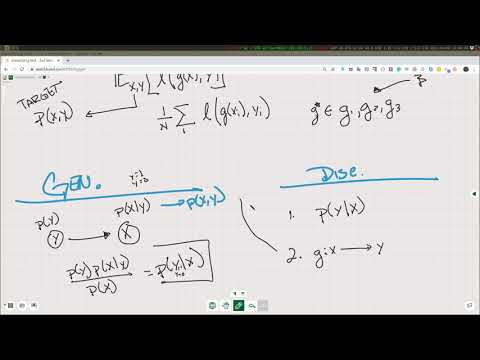

In [5]:
YouTubeVideo('2t9qdYcp1Jg', width=640,height=360)

## Exercise #2

Ok, now let's try and think about the conditional distributions, P(X|Y=1) and P(X|Y=1).

We will consider that our documents consist of two classes: (0) about people seeing ghosts and (1) about animal domestication. 

Given the assumptions we make as to the generating process of naive bayes, we assume that, conditional on the multinomial distribution that makes up the class of the document, each word in a document is independent.

Remember, a multinomial distribution is described by a probability vector that adds up to one, describing the probability that a given draw from the distribution will be one of the given classes described by the dimensions of the vector. 

Let's compute the multinomial probability distribution for each class and visualize it.

BONUS (that might help you with the assignment!) - let's compute the log difference in probability distributions for each class ($\pi_1 - \pi_0$) and visualize that! Note: you might want to apply "smoothing" in order to do this, adding a small $/alpha$ for each frequency so as to not have 0's in your probability vector. This $/alpha$ could be 1 to keep the term frequencies as integers and maintain interpretability, but you can also play around with a lower number!

In [ ]:
# 
# EXERCISE 2
#
# Classes:

y = np.array([0,0,0,1,1,1,1])

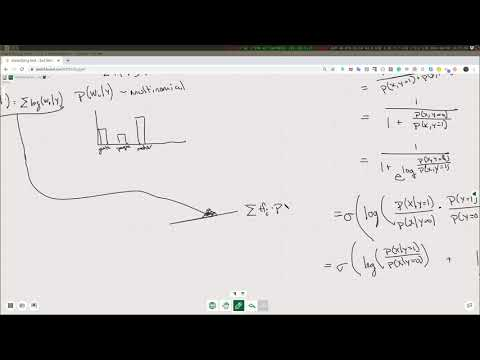

In [7]:
YouTubeVideo('8hyVe6-KhGM', width=640,height=360)

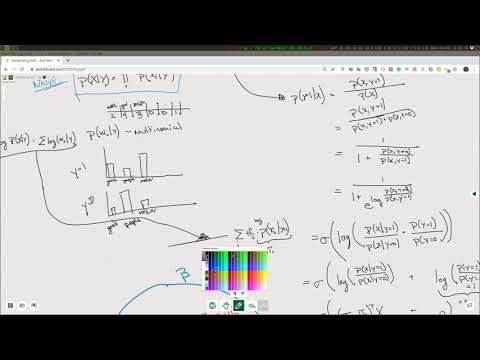

In [8]:
YouTubeVideo('eVIA-09QMxc', width=640,height=360)

## EXERCISE #3

Let's think about this independence assumption of the multinomial naive bayes. What it says is that the co-occurences of words together in a document is explained entirely by the class of the document. Words are pulled independently from the distribution that describes the class.

Let's test that!

Let's normalize each term frequency vector by it's L1 norm, so that it represents a probability estimate for each word within a document, a multinomial probability estimated within the document. Then we will compare this to the multinomial probability estimated for the class, across documents. If words were independent within a document, given the class, there should be no systematic correlation to them ocurring within a document as opposed to across documents of the same class. 

So we'll look at the conditional covariance/correlation between words in a document:

$$
E[ (tf_i - E[tf_i | y])(tf_j - E[tf_j | y ) | y ]
$$

What do you see? Any groups of words that co-occur within documents more often than they should, had they been independent?

In [9]:
#
# EXERCISE 3
#


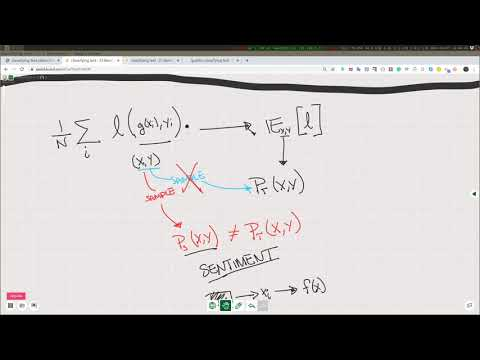

In [10]:
YouTubeVideo('kGH_jfLej2w', width=640,height=360)

## Exercise #4 

Take a look at [this classic paper from Andrew Ng and Michael Jordan](https://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf). They prove, in a more general context, the basic relationship between generative and discriminative classifiers I described in the lecture. 

Try to prove their results with the data available in the file `sentiment/yelps.csv`, which is data about yelp reviews. The column `positive` should be the target outcome (whether or not the review is positive).

To prove their results, use cross fold validation to compare the performance of the two classifiers with different amounts of training data, starting from `N=300` and moving up to over 10k observations. Plot the performance of Naive Bayes compared to Logistic Regression

In [ ]:
#
# EXERCISE 4
#
# Prove Ng and Jordan right!!!

yelps = pd.read_csv('sentiment/yelps.csv').sample(frac=1.)

vectorizer = TfidfVectorizer(min_df=20, 
                             max_df=.6, 
                             max_features=2000, 
                             use_idf=False, 
                             stop_words='english')

